Plotting complete for eye message e1.
Plotting complete for eye message e2.


C:\Users\Cole\AppData\Local\Temp\ipykernel_96088\181293522.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scatter_coords[m_count] = trigram
C:\Users\Cole\AppData\Local\Temp\ipykernel_96088\181293522.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scatter_coords[m_count] = trigram


Plotting complete for eye message e3.
Plotting complete for eye message e4.
Plotting complete for eye message e5.
Plotting complete for eye message w1.
Plotting complete for eye message w2.
Plotting complete for eye message w3.


C:\Users\Cole\AppData\Local\Temp\ipykernel_96088\181293522.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scatter_coords[m_count] = trigram
C:\Users\Cole\AppData\Local\Temp\ipykernel_96088\181293522.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scatter_coords[m_count] = trigram
C:\Users\Cole\AppData\Local\Temp\ipykernel_96088\181293522.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

Plotting complete for eye message w4.
Path plotting complete for eye message e1.
Path plotting complete for eye message e2.
Path plotting complete for eye message e3.
Path plotting complete for eye message e4.
Path plotting complete for eye message e5.
Path plotting complete for eye message w1.
Path plotting complete for eye message w2.
Path plotting complete for eye message w3.
Path plotting complete for eye message w4.


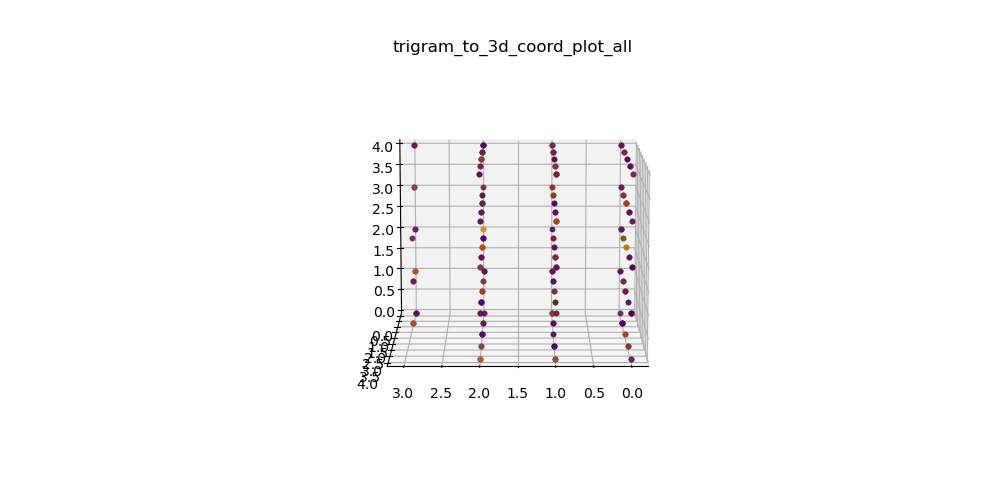

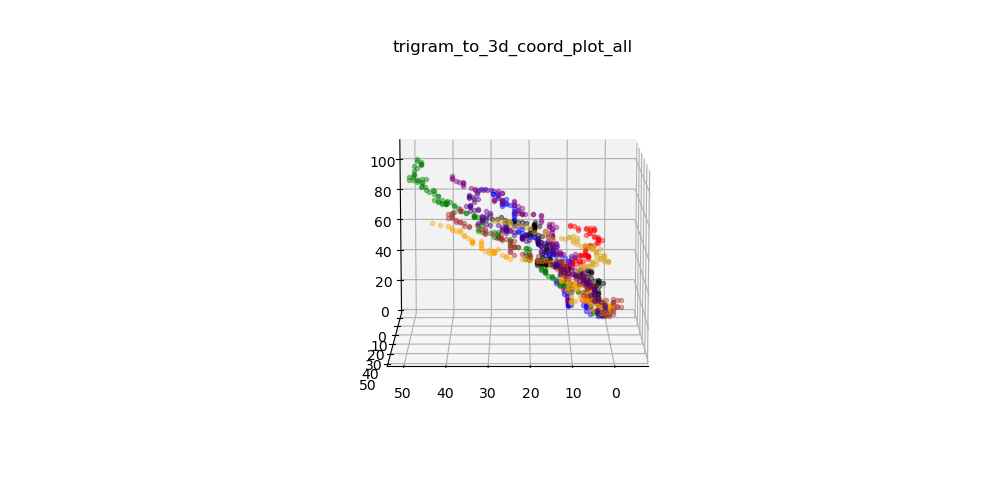

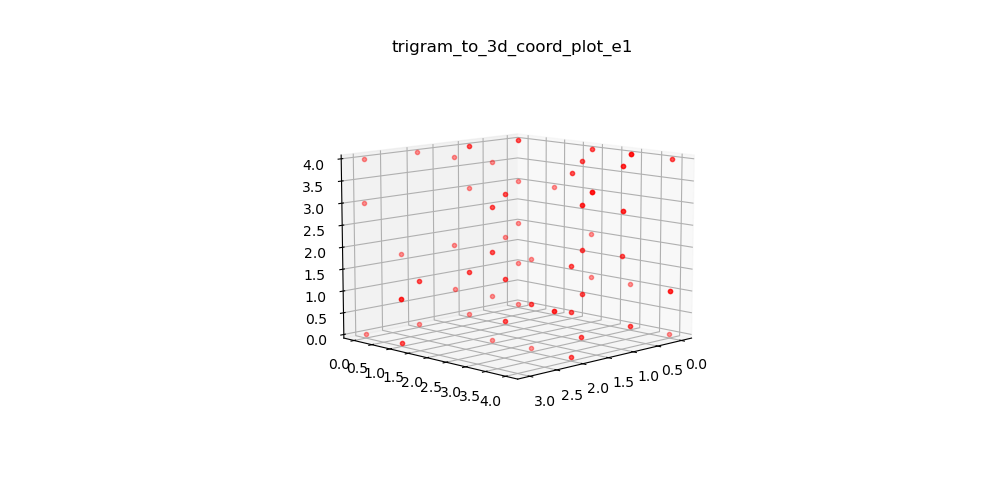

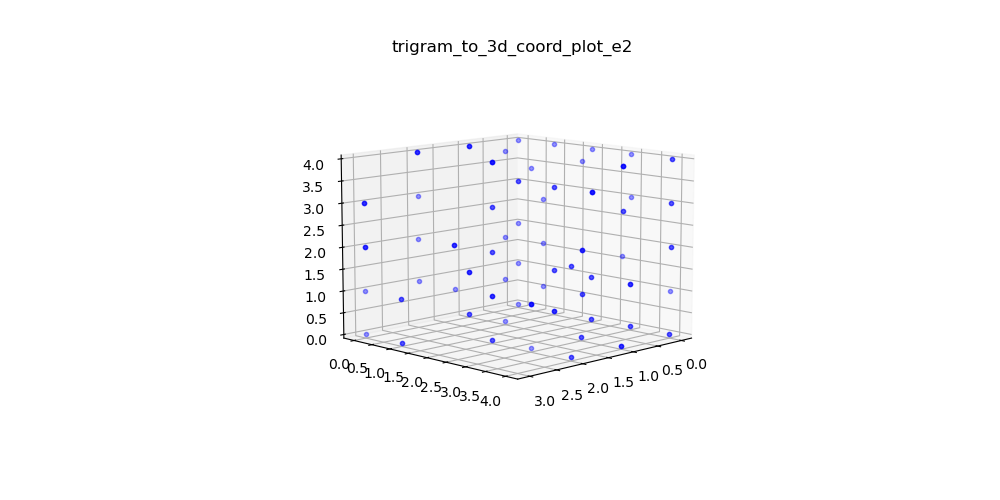

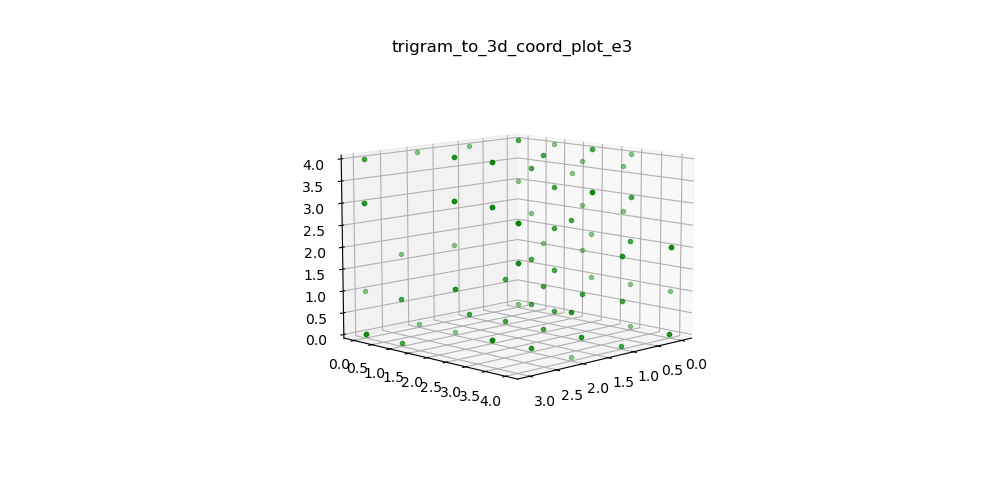

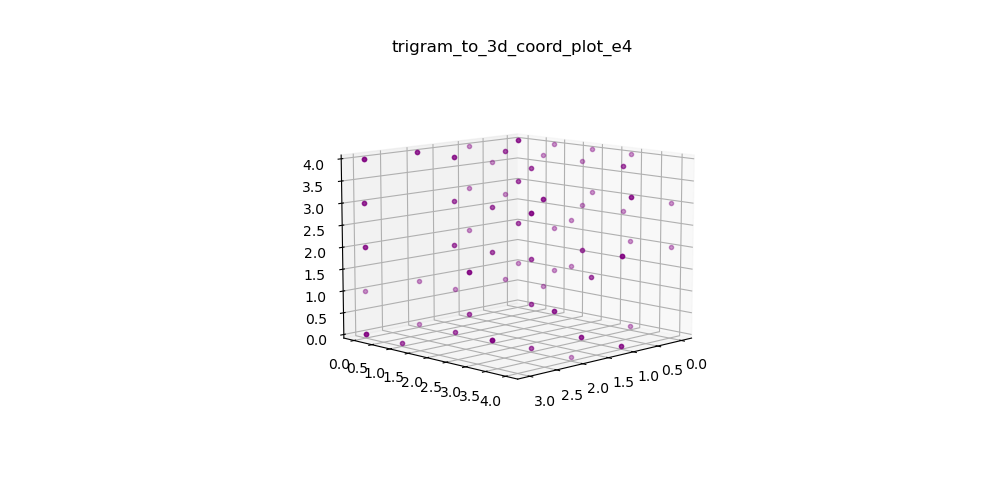

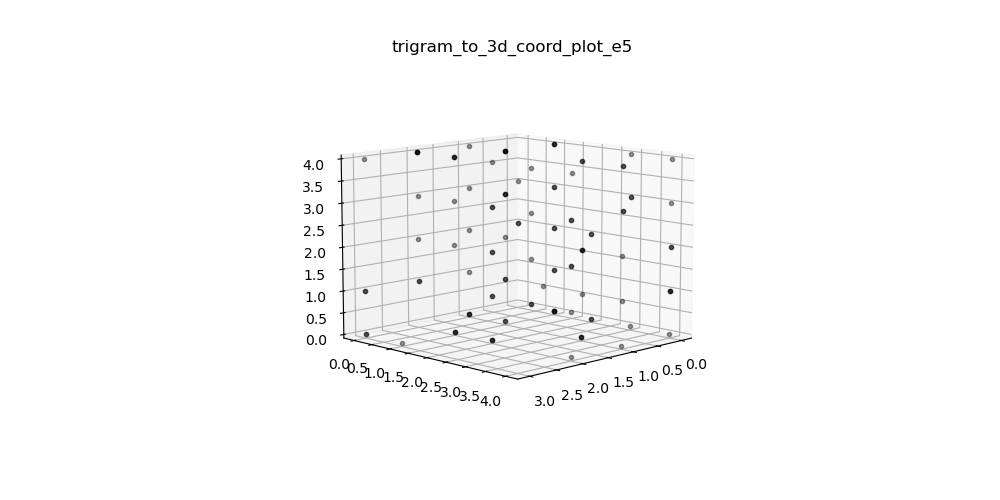

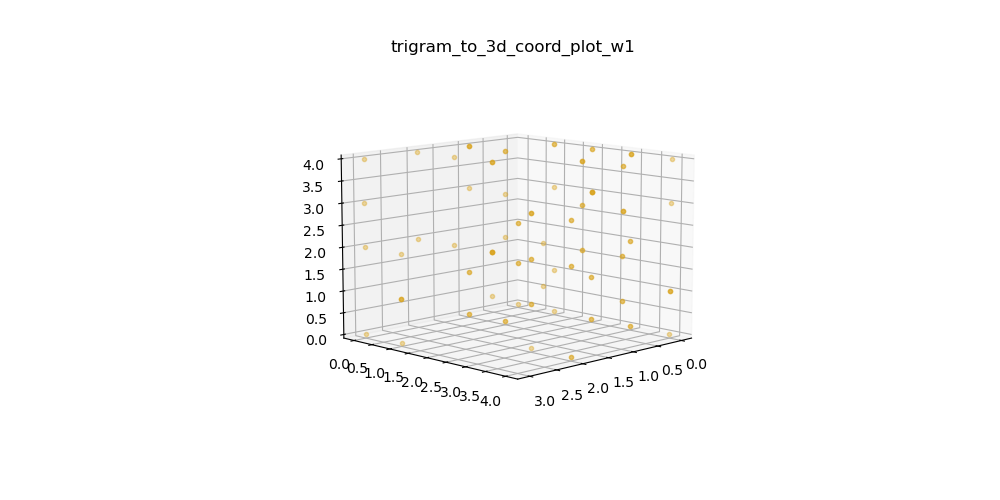

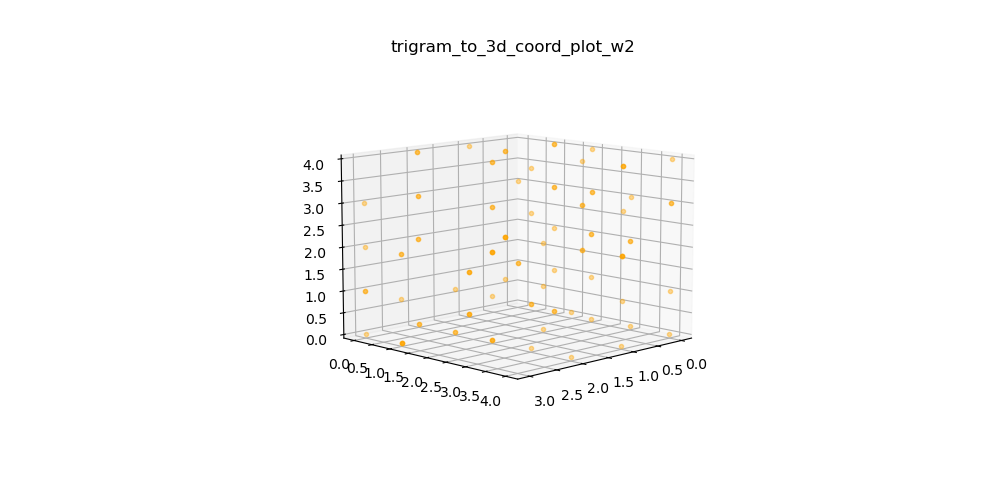

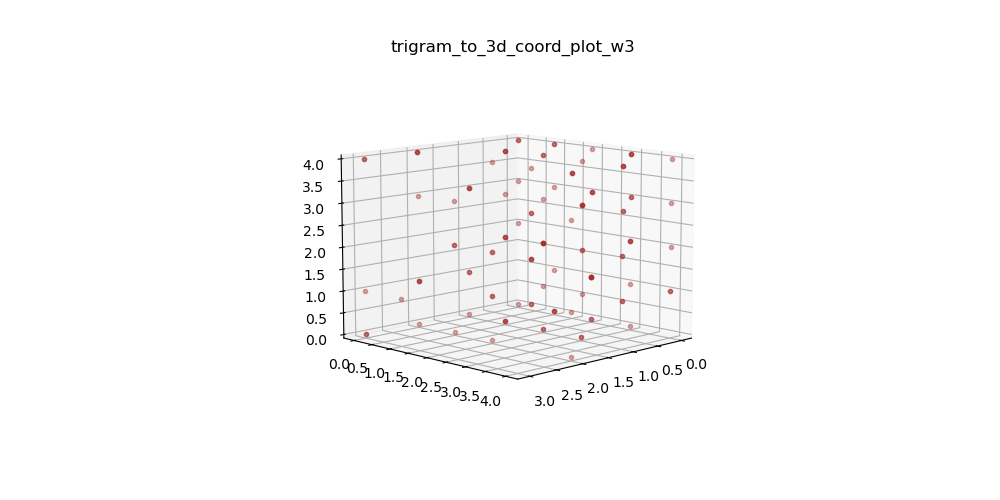

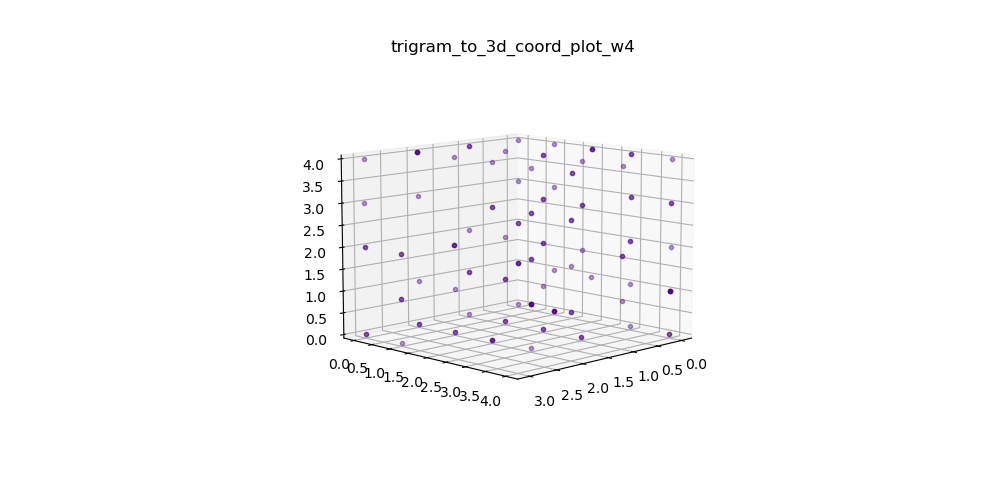

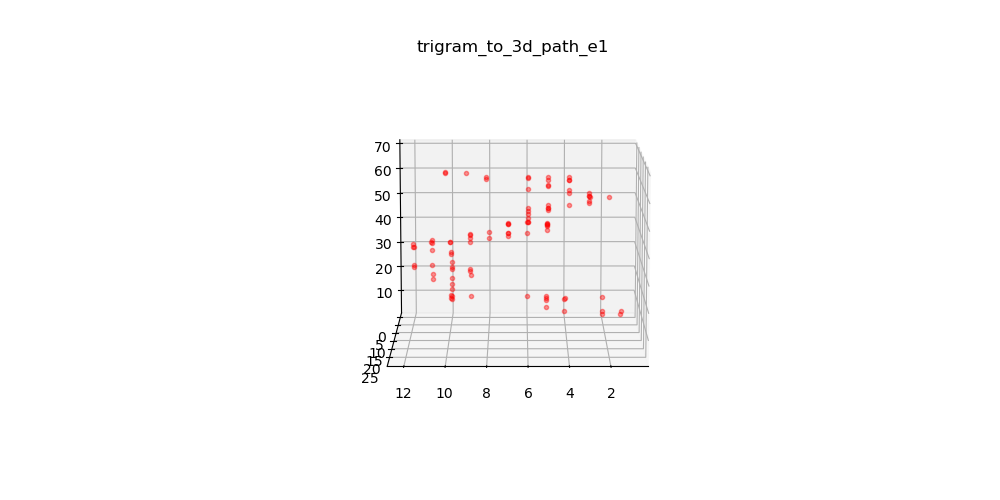

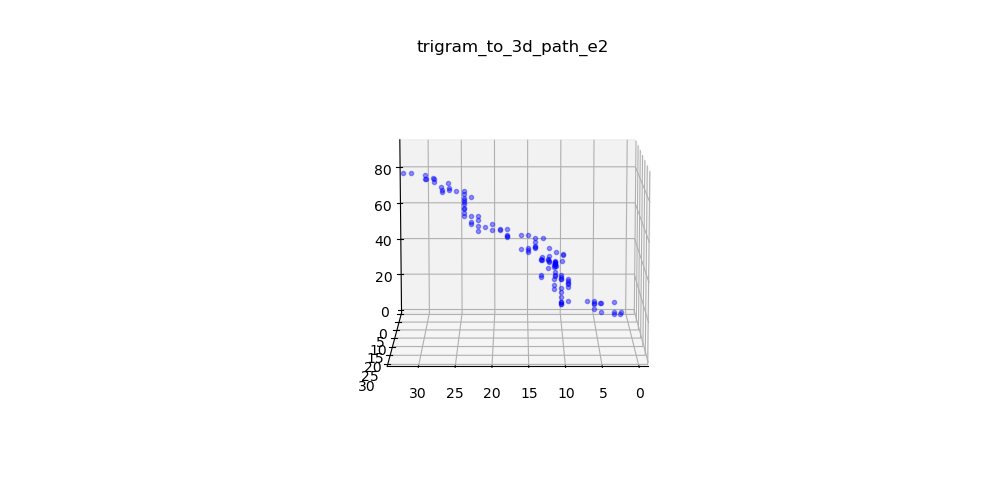

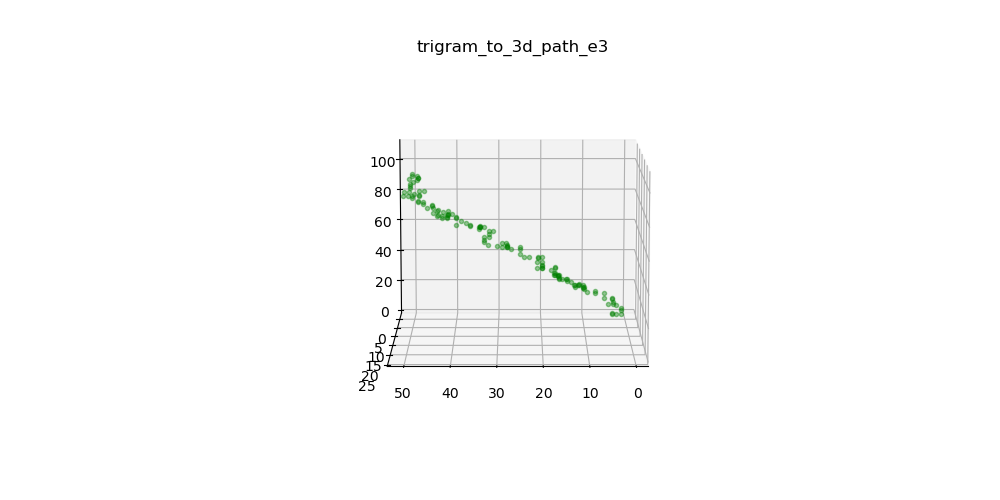

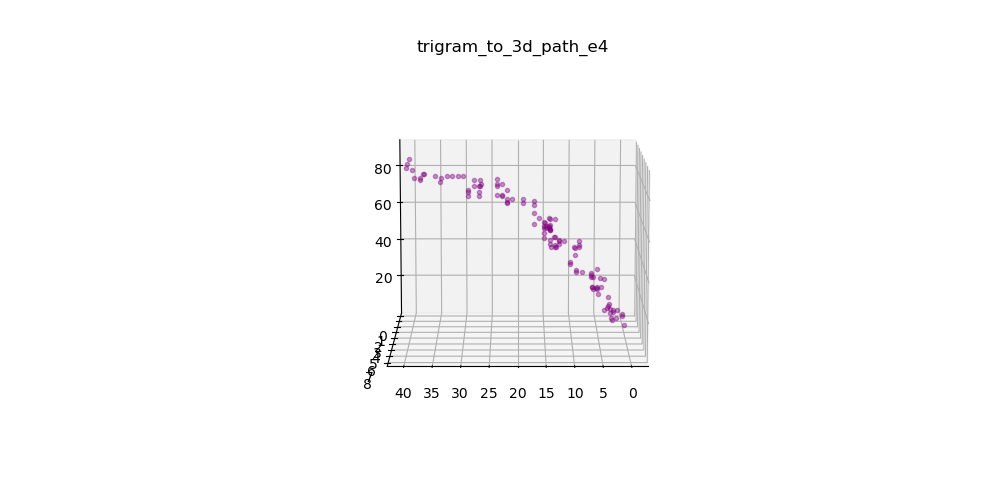

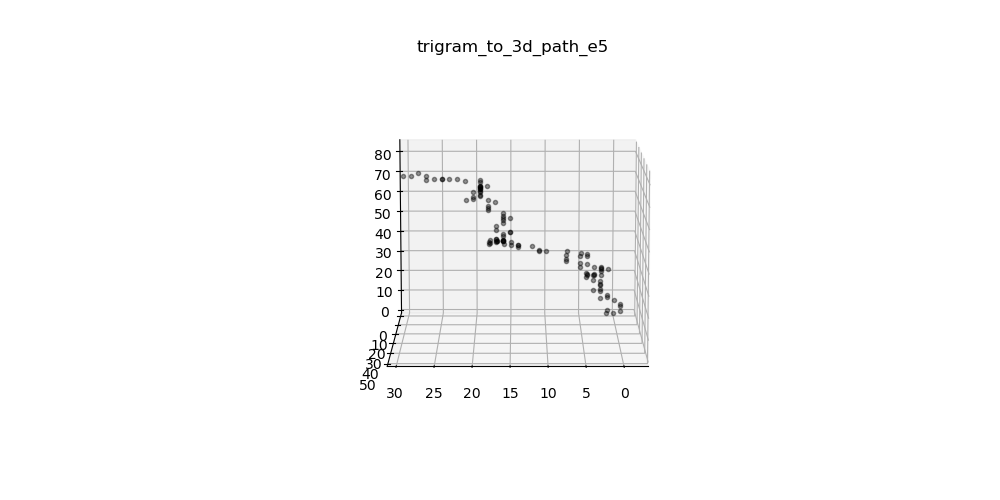

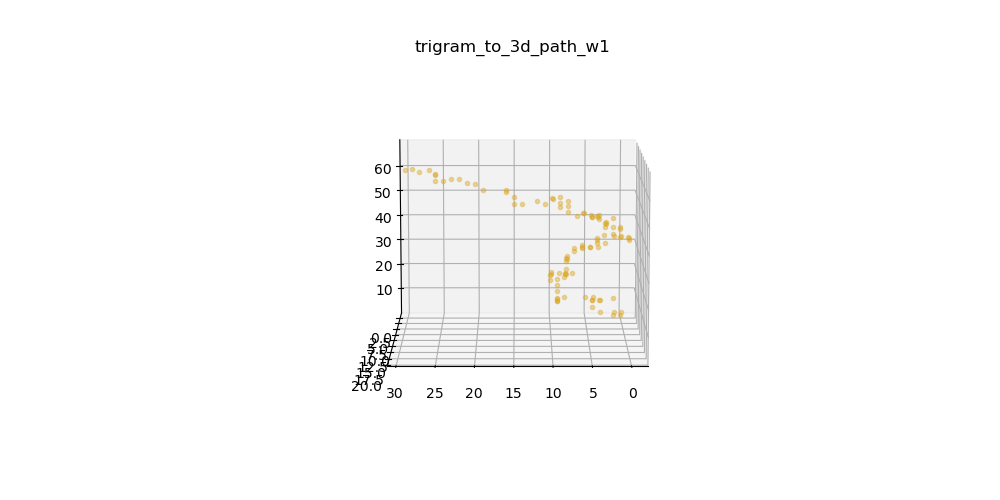

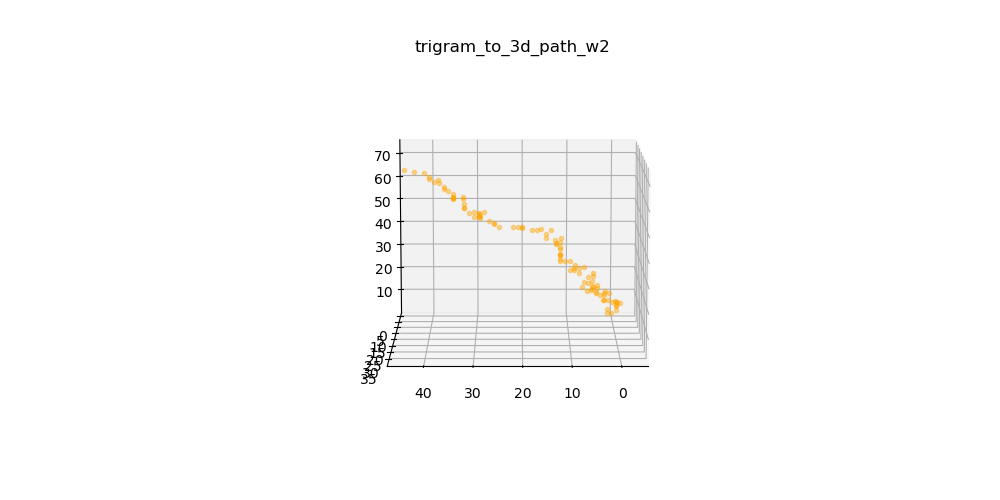

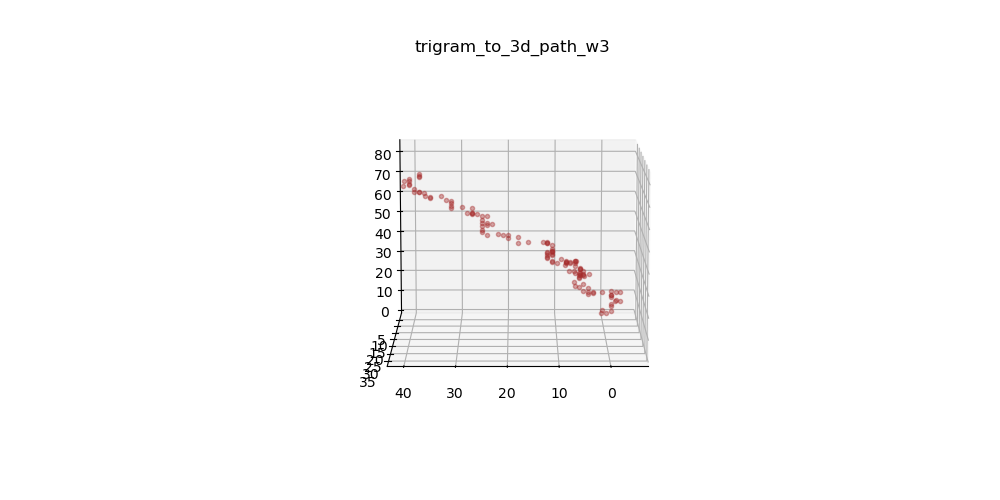

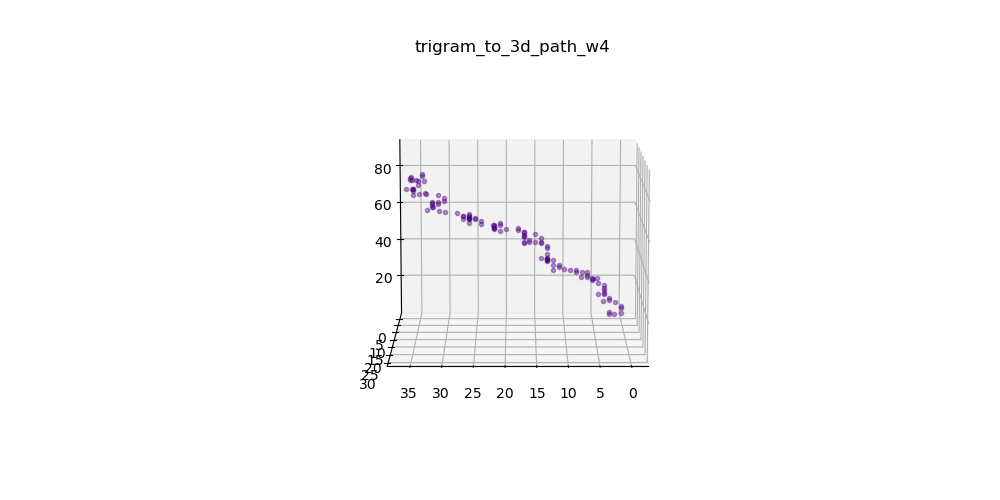

In [26]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  5 18:39:31 2024

@author: Cole

Eye-to-number:
--------------|
    1         |
              |
4   0   2     |
              |
    3         |
--------------|

Order for dataframe column 0-8:
    0:E1
    1:W1
    2:E2
    3:W2
    4:E3
    5:W3
    6:E4
    7:W4
    8:E5
"""
%matplotlib ipympl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipympl

save_files = False

group_to_index = {"e1":0,"w1":1,"e2":2,"w2":3,"e3":4,"w3":5,"e4":6,"w4":7,"e5":8}
index_to_group = {0:"e1",1:"w1",2:"e2",3:"w2",4:"e3",5:"w3",6:"e4",7:"w4",8:"e5"}

eyes = pd.read_csv("Noita Eye Data - Interleaved Trigrams.csv")
eyes.drop(columns=["#","Pos"], inplace= True)
eyes = eyes.transpose()

eyedir = {0:[0,0,1],
           1:[0,1,0],
           2:[1,0,0],
           3:[0,-1,0],
           4:[-1,0,0]}

global_alpha = 0.4
global_fig_size = [10,5]

fig_global = plt.figure(figsize=(global_fig_size[0],global_fig_size[1]))
ax_global = plt.axes(projection='3d')

filename_global = "trigram_to_3d_coord_plot_all"
ax_global.set_title(filename_global)

def plot_eyes_scatter(group,co,m):
    scatter_coords = pd.DataFrame()
    
    fig = plt.figure(figsize=(global_fig_size[0],global_fig_size[1]))
    ax = plt.axes(projection='3d')

    filename = str("trigram_to_3d_coord_plot_"+group)
    ax.set_title(filename)
    
    eyelist = pd.DataFrame(eyes[group_to_index[group]])
    eyelist.dropna(inplace=True)
    
    count = 1
    m_count = 0
    trigram = []
    last_trigram = [0,0,0]
    
    for eye in eyelist[group_to_index[group]]:
        if count > 3:
            
            scatter_coords[m_count] = trigram
            
            ax.plot3D(trigram[0], trigram[1],trigram[2], marker=m, color=co, alpha=global_alpha)
            ax_global.plot3D(trigram[0], trigram[1],trigram[2], marker=m, color=co, alpha=global_alpha)
            
            last_trigram = trigram
            trigram = []            
            count = 1
            
        trigram.append(int(eye))
        count += 1
        m_count += 1

    
    ax.view_init(elev=10., azim=45)
    
    print(str("Plotting complete for eye message " + group + "."))
    return

path_coords = pd.DataFrame()
scatter_coords = pd.DataFrame()


fig_b_global = plt.figure(figsize=(global_fig_size[0],global_fig_size[1]))
ax_b_global = plt.axes(projection='3d')
    
filename_b_global = "trigram_to_3d_path_all_groups"
ax_b_global.set_title(filename_global)

def plot_eyes_path(group, co, m):
    path_coords = pd.DataFrame()

    fig_b = plt.figure(figsize=(global_fig_size[0],global_fig_size[1]))
    ax_b = plt.axes(projection='3d')
    
    filename = str("trigram_to_3d_path_"+group)
    ax_b.set_title(filename)
    
    eyelist = pd.DataFrame(eyes[group_to_index[group]])
    eyelist.dropna(inplace=True)
    
   
    
    count = 1
    m_count = 0
    trigram = []
    coord = [0,0,0]
    last_coord = [0,0,0]
    
    for eye in eyelist[group_to_index[group]]:
        
        if count > 3:
            
            for e in trigram:
                
                d = eyedir[e]
                c = 0
                
                for nextdir in d:
                    
                    coord[c] += nextdir
                    c += 1
                
            path_coords[m_count] = coord
            
            ax_b.plot3D(coord[0], coord[1], coord[2], marker=m, color=co, alpha = global_alpha)
            ax_b_global.plot3D(coord[0], coord[1], coord[2], marker=m, color=co, alpha = global_alpha)
            
            last_coord = coord
            trigram = []
            count = 1
            
        trigram.append(int(eye))
        count += 1
        m_count += 1
    
    ax_b.view_init(elev=10., azim=90)
    print(str("Path plotting complete for eye message " + group + "."))
    
    return

eye_groups = ["e1","e2","e3","e4","e5","w1","w2","w3","w4"]
colors = ["red", "blue", "green","purple","black","goldenrod","orange","brown", "indigo"]
markers = [".", "v", "o", "8", ">", "p", "D", "^", "1"]

for i in range(2):
    c=0
    
    for eg in eye_groups:
        
        if i == 1:
        
            plot_eyes_path(eg, colors[c], ".")
            
        else:
            
            plot_eyes_scatter(eg, colors[c], ".")
            
        c+=1
    i += 1

ax_global.view_init(elev=10., azim=90)
ax_b_global.view_init(elev=10., azim=90)
print("All Plotting Now Complete")
